<a href="https://colab.research.google.com/github/sowmyakovur20/machinelearninghw/blob/main/Task2%263_ML_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1299]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px 
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import time
import random

In [1300]:
from sklearn.datasets import load_iris
iris = load_iris()
iris_data = pd.DataFrame(iris.data, columns = iris.feature_names)

In [1301]:
iris_data['label'] = iris.target
iris_data.head(100)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


In [1302]:
iris_data['label'].value_counts()

2    50
1    50
0    50
Name: label, dtype: int64

In [1303]:
points_t2 = iris_data.iloc[:,:-1].values
points_t2[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [1304]:
def euclidean(p1,p2):
  return np.linalg.norm(p1 - p2)

In [1305]:
def manhattan(p1,p2):
  return np.abs(p1 - p2).sum()

In [1306]:
def cosine(p1,p2):
  num = np.dot(p1,p2)
  den = np.linalg.norm(p1) * np.linalg.norm(p2)
  return 1 - (num/den)

In [1307]:
def jaccard(p1,p2):
  jc_num = 0
  jc_den = 0
  for n in range(0,len(p1)):
    jc_num = jc_num + min(p1[n],p2[n])
  for d in range(0,len(p1)):
    jc_den = jc_den + max(p1[d],p2[d])
  return 1 - (jc_num/jc_den)

In [1308]:
#Initializing Centroids for KMeans
def get_initial_centroids(points,n):
  p_list = points.tolist()
  c = []
  for i in range(0,n):
    r = random.randint(0,len(p_list)-1)
    random.shuffle(p_list)
    c.append(p_list[r])
  return np.array(c)

In [1309]:
#Calculating SSE for KMeans
def sse(centroids,points):
  sse_kmeans = 0
  for i in range(0,len(centroids)):
    points_array = points[points['cluster'] == i].iloc[:,:-1].values
    for j in range(0,len(points_array)):
      sse_kmeans += euclidean(centroids[i],points_array[j])
  return sse_kmeans

In [1310]:
#Computing Centroid
def centroid(points):
  total = points.shape[0]
  c = []
  for i in range(0,points.shape[1]):
    c.append(np.sum(points[:,i])/total)
  return np.array(c)

In [1311]:
#Implementation of KMeans algorithm
def kmeans(points, distance, centroids, max_iter = None):
  labels = [range(0,len(centroids))]
  df_points = pd.DataFrame(points)
  iterations = 0
  sse_k = []

  while True:
    if iterations != 0:
      centroids = centroids_new

    labels = []
    for i in range(0,len(points)):
      d = []
      for j in centroids:
        d.append(distance(points[i],j))
      labels.append(np.argmin(d))
    df_points['cluster'] = labels

    c_new = []
    for k in range(0,len(centroids)):
      c_new.append(centroid(df_points[df_points['cluster'] == k].iloc[:,:-1].values))

    centroids_new = np.array(c_new)

    sse_k.append(sse(centroids_new, df_points))

    if iterations == 0:
      centroids_all = [centroids_new]
    else:
      centroids_all.append(centroids_new)
   
    if (centroids == centroids_new).all() and max_iter == None:
      break
    elif max_iter == iterations:
      break

    iterations = iterations + 1
  
  return df_points, centroids_all, iterations, sse_k

In [1312]:
#Centroids(Initial)
centroids_t2 = get_initial_centroids(points_t2,3)
centroids_t2

array([[5.5, 2.3, 4. , 1.3],
       [5.4, 3.4, 1.7, 0.2],
       [6. , 2.9, 4.5, 1.5]])

**Task-2 Question-1**

In [1313]:
t1_start = time.time()
data1_t2, c1_t2_all, iter1_t2, sse1_t2 = kmeans(points_t2,euclidean,centroids_t2)
t1_end = time.time()

In [1314]:
#Final centroids
print('Final centroids \n', c1_t2_all[-1])

Final centroids 
 [[5.88360656 2.74098361 4.38852459 1.43442623]
 [5.006      3.428      1.462      0.246     ]
 [6.85384615 3.07692308 5.71538462 2.05384615]]


In [1315]:
#Predicted labels
data1_t2['cluster'].value_counts()

0    61
1    50
2    39
Name: cluster, dtype: int64

In [1316]:
#SSE
sse1_t2[-1]

97.22486903387325

**Cosine Distance**

In [1317]:
t2_start = time.time()
data2_t2, c2_t2_all, iter2_t2, sse2_t2 = kmeans(points_t2,cosine,centroids_t2)
t2_end = time.time()

In [1318]:
#Final centroids
print('Final centroids \n', c2_t2_all[-1])

Final centroids 
 [[5.94666667 2.75777778 4.20444444 1.29777778]
 [5.006      3.428      1.462      0.246     ]
 [6.52       2.96545455 5.48       1.98545455]]


In [1319]:
#Predicted labels
data2_t2['cluster'].value_counts()

2    55
1    50
0    45
Name: cluster, dtype: int64

In [1320]:
#SSE
sse2_t2[-1]

102.2982582163916

In [1321]:
t3_start = time.time()
data3_t2, c3_t2_all, iter3_t2, sse3_t2 = kmeans(points_t2,jaccard,centroids_t2)
t3_end = time.time()

In [1322]:
#Final centroids
print('Final centroids \n', c3_t2_all[-1])

Final centroids 
 [[5.69210526 2.66578947 4.11578947 1.27368421]
 [5.006      3.428      1.462      0.246     ]
 [6.61129032 2.9983871  5.39032258 1.92258065]]


In [1323]:
#Predicted labels
data3_t2['cluster'].value_counts()

2    62
1    50
0    38
Name: cluster, dtype: int64

In [1324]:
#SSE
sse3_t2[-1]

98.22849172595194

**Task-2 Question-2**

In [1325]:
original_label_count = [50,50,50]
total = sum(original_label_count)

In [1326]:
#Accuracy using Euclidean
label_count_e = data1_t2['cluster'].value_counts()

wrong = 0
for i in range(0,len(original_label_count)):
  if original_label_count[i] < label_count_e[i]:
    wrong += label_count_e[i] - original_label_count[i]

accuracy_e = (total - wrong) / total
print(accuracy_e*100)

92.66666666666666


In [1327]:
#Accuracy using Cosine
label_count_c = data2_t2['cluster'].value_counts()

wrong = 0
for i in range(0,len(original_label_count)):
  if original_label_count[i] < label_count_c[i]:
    wrong += label_count_c[i] - original_label_count[i]

accuracy_c = (total - wrong) / total
print(accuracy_c*100)

96.66666666666667


In [1328]:
#Accuracy using Jaccard
label_count_j = data3_t2['cluster'].value_counts()

wrong = 0
for i in range(0,len(original_label_count)):
  if original_label_count[i] < label_count_j[i]:
    wrong += label_count_j[i] - original_label_count[i]

accuracy_j = (total - wrong) / total
print(accuracy_j*100)

92.0


Task-2 Question-3

In [1329]:
iter1_t2

10

In [1330]:
iter2_t2

6

In [1331]:
iter3_t2

5

In [1332]:
#Execution time using Euclidean
t1_end - t1_start

0.22950530052185059

In [1333]:
#Execution time using Cosine
t2_end - t2_start

0.11236238479614258

In [1334]:
#Execution time using Jaccard
t3_end - t3_start

0.1364302635192871

**Task-2 Question-4**

In [1335]:
t1_start_100 = time.time()
data1_t2_100, c1_t2_all_100, iter1_t2_100, sse1_t2_100 = kmeans(points_t2,euclidean,centroids_t2,100)
t1_end_100 = time.time()

In [1336]:
#Execution time using Euclidean for max_iter = 100
t1_end_100 - t1_start_100

1.1677055358886719

In [1337]:
t2_start_100 = time.time()
data2_t2_100, c2_t2_all_100, iter2_t2_100, sse2_t2_100 = kmeans(points_t2,cosine,centroids_t2,100)
t2_end_100 = time.time()

In [1338]:
#Execution time using Cosine for max_iter = 100
t2_end_100 - t2_start_100

1.4773423671722412

In [1339]:
t3_start_100 = time.time()
data3_t2_100, c3_t2_all_100, iter3_t2_100, sse3_t2_100 = kmeans(points_t2,jaccard,centroids_t2,100)
t3_end_100 = time.time()

In [1340]:
#Execution time using Jaccard for max_iter = 100
t3_end_100 - t3_start_100

1.2864749431610107

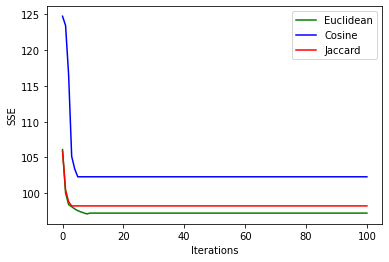

In [1341]:
x = list(range(0,101))
plt.plot(x,sse1_t2_100, color = 'green')
plt.plot(x,sse2_t2_100, color = 'blue')
plt.plot(x,sse3_t2_100, color = 'red')
plt.xlabel('Iterations')
plt.ylabel('SSE')
plt.legend(('Euclidean', 'Cosine', 'Jaccard'))
plt.show()

**Task - 3**

In [1342]:
A = np.array([[4.7,3.2],[4.9,3.1],[5.0,3.0],[4.6,2.9]])
B = np.array([[5.9,3.2],[6.7,3.1],[6,3],[6.2,2.8]])

In [1343]:
d = pd.DataFrame(columns = ['Cluster A','Cluster B','Distance'])
for i in A:
  for j in B:
    d = d.append(pd.DataFrame([[i,j,format(euclidean(i,j),'.4f')]], columns = d.columns), ignore_index = True)

In [1344]:
print(d)

     Cluster A   Cluster B Distance
0   [4.7, 3.2]  [5.9, 3.2]   1.2000
1   [4.7, 3.2]  [6.7, 3.1]   2.0025
2   [4.7, 3.2]  [6.0, 3.0]   1.3153
3   [4.7, 3.2]  [6.2, 2.8]   1.5524
4   [4.9, 3.1]  [5.9, 3.2]   1.0050
5   [4.9, 3.1]  [6.7, 3.1]   1.8000
6   [4.9, 3.1]  [6.0, 3.0]   1.1045
7   [4.9, 3.1]  [6.2, 2.8]   1.3342
8   [5.0, 3.0]  [5.9, 3.2]   0.9220
9   [5.0, 3.0]  [6.7, 3.1]   1.7029
10  [5.0, 3.0]  [6.0, 3.0]   1.0000
11  [5.0, 3.0]  [6.2, 2.8]   1.2166
12  [4.6, 2.9]  [5.9, 3.2]   1.3342
13  [4.6, 2.9]  [6.7, 3.1]   2.1095
14  [4.6, 2.9]  [6.0, 3.0]   1.4036
15  [4.6, 2.9]  [6.2, 2.8]   1.6031


In [1345]:
total_distance = [float(i) for i in d['Distance'].values]
total_distance = sum(total_distance)
total_distance

22.605800000000002

In [1346]:
total_pairs = len(d)
total_pairs

16

In [1347]:
average_distance = total_distance / total_pairs
average_distance

1.4128625000000001